In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbs = ['ddf_0.23deg_1exp_pairsmix_1yrs.db',  'ddf_pn_0.23deg_1exp_pairsmix_1yrs.db',
       'ddf_0.70deg_1exp_pairsmix_1yrs.db',  'ddf_pn_0.70deg_1exp_pairsmix_1yrs.db',
       '../baselines/baseline_1exp_pairsmix_10yrs.db']


In [3]:
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)
# EXDFS
RA = 53.125
dec = -28.-6/60.

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="r" for columns ['fieldRA', 'fieldDec', 'observationStartMJD']
Found 62240 visits
Running:  ['opsim_Count_observationStartMJD_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="r" for columns ['fieldRA', 'fieldDec', 'observationStartMJD']
Found 62658 visits
Running:  ['opsim_Count_observationStartMJD_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="r" for columns ['fieldRA', 'fieldDec', 'observationStartMJD']
Found 62698 visits
Running:  ['opsim_Count_observationStartMJD_r_HEAL']
Completed me

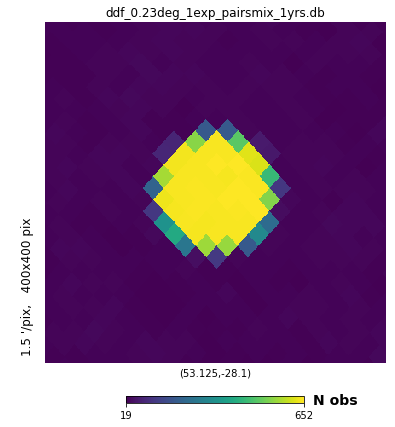

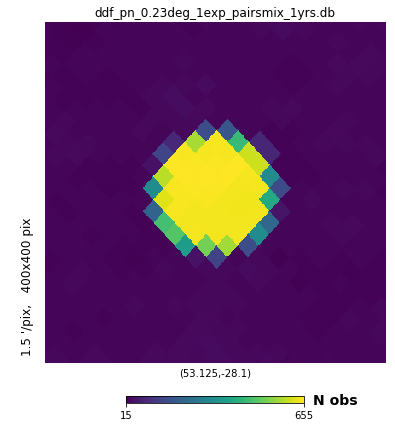

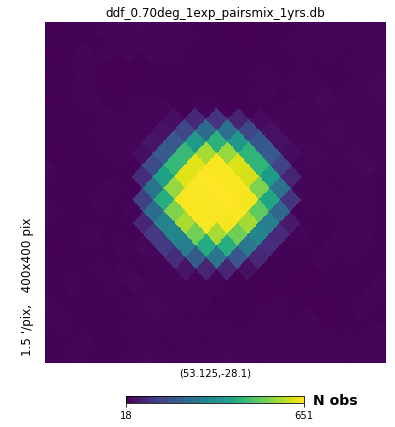

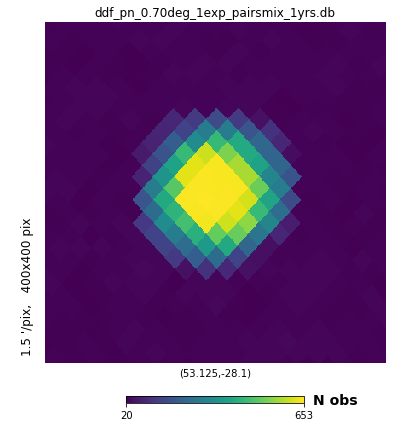

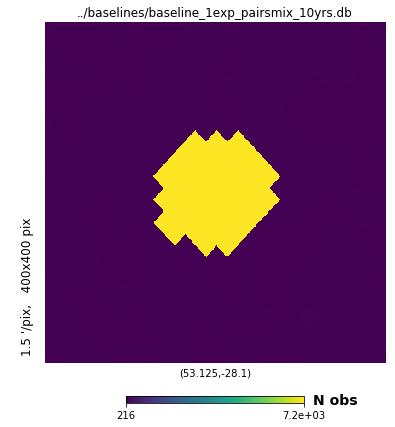

In [4]:

for database in dbs:
    conn = db.OpsimDatabase(database)
    bundleList = []

    metric = metrics.CountMetric(col='observationStartMJD')
    slicer = slicers.HealpixSlicer()
    sql = 'filter="r"'
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    hp.gnomview(bundleList[0].metricValues, rot=(RA, dec), xsize=400, title=database, unit='N obs')